<a href="https://colab.research.google.com/github/VastavBhagat/Tweeter-Sentiment-Analysis/blob/main/Twitter_Sentiment_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Twitter_Sentiment_Prediction

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('twitter_training.csv', header=None)
data.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [3]:
# in the above dataset there are no columns name contain, assigning column name manually

data.columns = ['Tweet ID', 'Entity', 'Sentiment', 'Tweets']

In [4]:
data.head()

,Tweet ID,Entity,Sentiment,Tweets
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
data.shape

(74682, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Tweet ID   74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Tweets     73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Data Cleaning

In [7]:
# 'Tweet ID' & 'Entity' not required for sentiment analysis, so will remove it

data.drop(columns=['Tweet ID', 'Entity'], inplace=True)

In [8]:
data.isnull().sum()

Sentiment      0
Tweets       686
dtype: int64

In [9]:
data.dropna(inplace=True)

In [10]:
data.duplicated().sum()

4227

In [11]:
data.drop_duplicates(inplace=True)

### EDA

In [12]:
data['Sentiment'].value_counts()

Negative      21237
Positive      19138
Neutral       17110
Irrelevant    12284
Name: Sentiment, dtype: int64

<Axes: xlabel='Sentiment', ylabel='count'>

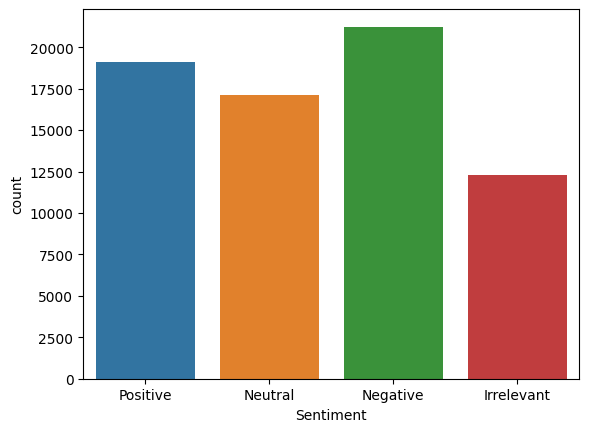

In [13]:
sns.countplot(data=data, x=data['Sentiment'])

### Text Preprocessing

In [14]:
import nltk

In [15]:
# Normalization

data['Tweets'] = data['Tweets'].str.lower()

In [16]:
# remove puctuations, html tags and URLs

import re

# puctuations
def rem_puct (text):
    cleaned_tweet = re.sub(r'[^\w\s]', '', text)
    return(cleaned_tweet)

# html tags
def rem_html (text_htm):
    cleaned_tweet = re.sub(r'<.*?>', '', text_htm)
    return(cleaned_tweet)


# URLS
def rem_url (text):
    cleaned_tweet = re.sub(r'http\S+|www\S+|https\S+', '', text)
    return(cleaned_tweet)

In [17]:
# checking

rem_puct('Today??? was a,,, beautiful day!!!!')
rem_html('The sun shone brightly in the clear blue sky,<html> and a gentle breeze < rustled through head> the trees')

#function working perfectly


'The sun shone brightly in the clear blue sky, and a gentle breeze  the trees'

In [18]:
data['cleaned_tweet'] = data['Tweets'].apply(rem_puct).apply(rem_html).apply(rem_url)

In [19]:
data.sample(10)

,Sentiment,Tweets,cleaned_tweet
65733,Neutral,"johnson & johnson (jnj) stock down 2% fri, cor...",johnson johnson jnj stock down 2 fri coronavi...
46273,Positive,thank you for helping small businesses. lifebl...,thank you for helping small businesses lifeblo...
61020,Irrelevant,i had a dream my girlfriend and i got married ...,i had a dream my girlfriend and i got married ...
19556,Neutral,"damn, such a hard decision atm. if i want to j...",damn such a hard decision atm if i want to joi...
15756,Irrelevant,i am egg man dota 2 i hate robbie - casey,i am egg man dota 2 i hate robbie casey
72277,Negative,"@ ghostrecon _ uk, what the hell is going on f...",ghostrecon _ uk what the hell is going on for...
72078,Negative,@ghostrecon_uk we paid for your shit game you ...,ghostrecon_uk we paid for your shit game you know
7612,Negative,and filthy casual spams overwatch junkenstein ...,and filthy casual spams overwatch junkenstein ...
17973,Positive,who mama i gotta fight to get me the ps5,who mama i gotta fight to get me the ps5
38894,Neutral,hearthstone els first play thru. i am bad dont...,hearthstone els first play thru i am bad dont ...


In [20]:
# Tokenization

from nltk.tokenize import word_tokenize, sent_tokenize

In [21]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [22]:
# sentence tokenization

data['tweet_sentences'] = data['cleaned_tweet'].apply(sent_tokenize)

In [23]:
# check
sentence = 'As I walked, I stumbled upon an old bookstore nestled in a quiet corner. Curiosity got the better of me, and I stepped inside. The smell of aged books filled the air, creating an atmosphere of nostalgia. I spent hours perusing the shelves, discovering hidden literary gems and immersing myself in their worlds.'
sent_tokenize(sentence)

['As I walked, I stumbled upon an old bookstore nestled in a quiet corner.',
 'Curiosity got the better of me, and I stepped inside.',
 'The smell of aged books filled the air, creating an atmosphere of nostalgia.',
 'I spent hours perusing the shelves, discovering hidden literary gems and immersing myself in their worlds.']

In [24]:
# word tokenization

data['tweet_words'] = data['cleaned_tweet'].apply(word_tokenize)


In [25]:
#check
sentence = 'After leaving the bookstore, I treated myself to a scoop of delicious ice cream from a nearby shop. The cold sweetness was a perfect complement to the warm day.'
word = word_tokenize(sentence)

In [26]:
data.sample(5)

,Sentiment,Tweets,cleaned_tweet,tweet_sentences,tweet_words
4784,Negative,you want to slow the spread of shut down,you want to slow the spread of shut down,[you want to slow the spread of shut down],"[you, want, to, slow, the, spread, of, shut, d..."
40756,Negative,@niklasastrand hey i was hoping you can use he...,niklasastrand hey i was hoping you can use hel...,[niklasastrand hey i was hoping you can use he...,"[niklasastrand, hey, i, was, hoping, you, can,..."
23719,Positive,it's been a few days since the announcement of...,its been a few days since the announcement of ...,[its been a few days since the announcement of...,"[its, been, a, few, days, since, the, announce..."
72079,Negative,@ ghostrecon _ uk we paid for the shit you know,ghostrecon _ uk we paid for the shit you know,[ ghostrecon _ uk we paid for the shit you know],"[ghostrecon, _, uk, we, paid, for, the, shit, ..."
70639,Negative,@ ghostrecon i just got the error whalers-0030...,ghostrecon i just got the error whalers00303 ...,[ ghostrecon i just got the error whalers00303...,"[ghostrecon, i, just, got, the, error, whalers..."


In [27]:
# stopwords remove

from nltk.corpus import stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [28]:
stop_words = set(stopwords.words('english'))

def remove_sw(text):
    cleaned = [word for word in text if word not in stop_words]
    return(cleaned)

In [29]:
# check

# After leaving the bookstore, I treated myself to a scoop of delicious ice cream from a nearby shop. The cold sweetness was a perfect complement to the warm day.

remove_sw(word)

['After',
 'leaving',
 'bookstore',
 ',',
 'I',
 'treated',
 'scoop',
 'delicious',
 'ice',
 'cream',
 'nearby',
 'shop',
 '.',
 'The',
 'cold',
 'sweetness',
 'perfect',
 'complement',
 'warm',
 'day',
 '.']

In [32]:
data['tweet_words'] = data['tweet_words'].apply(remove_sw)

In [33]:
# lemmatization and stemming
# lemmatization gives more accuracy for root words
# in a steaming time is faster


from nltk.stem import WordNetLemmatizer, PorterStemmer
nltk.download('wordnet')

lem = WordNetLemmatizer()
stem = PorterStemmer()

# steamming
"""def stem_word(clean_word):
    return [stem.stem(word) for word in clean_word]"""

# lemmatization
def lem_word(clean_word):
    return [lem.lemmatize(word, pos='v') for word in clean_word]

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
# After leaving the bookstore, I treated myself to a scoop of delicious ice cream from a nearby shop. The cold sweetness was a perfect complement to the warm day.
lem_word(word)

['After',
 'leave',
 'the',
 'bookstore',
 ',',
 'I',
 'treat',
 'myself',
 'to',
 'a',
 'scoop',
 'of',
 'delicious',
 'ice',
 'cream',
 'from',
 'a',
 'nearby',
 'shop',
 '.',
 'The',
 'cold',
 'sweetness',
 'be',
 'a',
 'perfect',
 'complement',
 'to',
 'the',
 'warm',
 'day',
 '.']

In [35]:
data['tweet_words'] = data['tweet_words'].apply(lambda x: lem_word(x))

In [36]:
data['tweet_words'] = data['tweet_words'].apply(lambda x: ' '.join(x))

In [37]:
data['tweet_words_counts'] = data['tweet_words'].apply(lambda x:len(x))

In [38]:
data.sample(10)

,Sentiment,Tweets,cleaned_tweet,tweet_sentences,tweet_words,tweet_words_counts
65297,Neutral,@eamaddennfl i’ve watched every relief series ...,eamaddennfl ive watched every relief series si...,[eamaddennfl ive watched every relief series s...,eamaddennfl ive watch every relief series sinc...,199
58785,Negative,all my interest in the past came from people t...,all my interest in the past came from people t...,[all my interest in the past came from people ...,interest past come people dont know single thi...,111
7904,Positive,this is literally one of the best things they'...,this is literally one of the best things theyv...,[this is literally one of the best things they...,literally one best things theyve ever do omfg ...,70
20676,Neutral,check out this item i just got! [heart of a ch...,check out this item i just got heart of a cham...,[check out this item i just got heart of a cha...,check item get heart champion,29
42412,Negative,4 cuz i love pubg more than my buddy bae.,4 cuz i love pubg more than my buddy bae,[4 cuz i love pubg more than my buddy bae],4 cuz love pubg buddy bae,25
32418,Positive,list of things that i hate that i still willin...,list of things that i hate that i still willin...,[list of things that i hate that i still willi...,list things hate still willingly indulge play ...,113
72876,Negative,never in my life have i wanted to give a compa...,never in my life have i wanted to give a compa...,[never in my life have i wanted to give a comp...,never life want give company 700 bad cant dang...,75
4540,Positive,"you wanna know, i'm actually excited about sup...",you wanna know im actually excited about super...,[you wanna know im actually excited about supe...,wan na know im actually excite super cod versu...,135
28964,Negative,2 times now while during end game i randomly e...,2 times now while during end game i randomly e...,[2 times now while during end game i randomly ...,2 time end game randomly end back lobby wtf yo...,55
11444,Positive,"the coolest thing that can happen with xbox, b...",the coolest thing that can happen with xbox bu...,[the coolest thing that can happen with xbox b...,coolest thing happen xbox im still skeptical,44


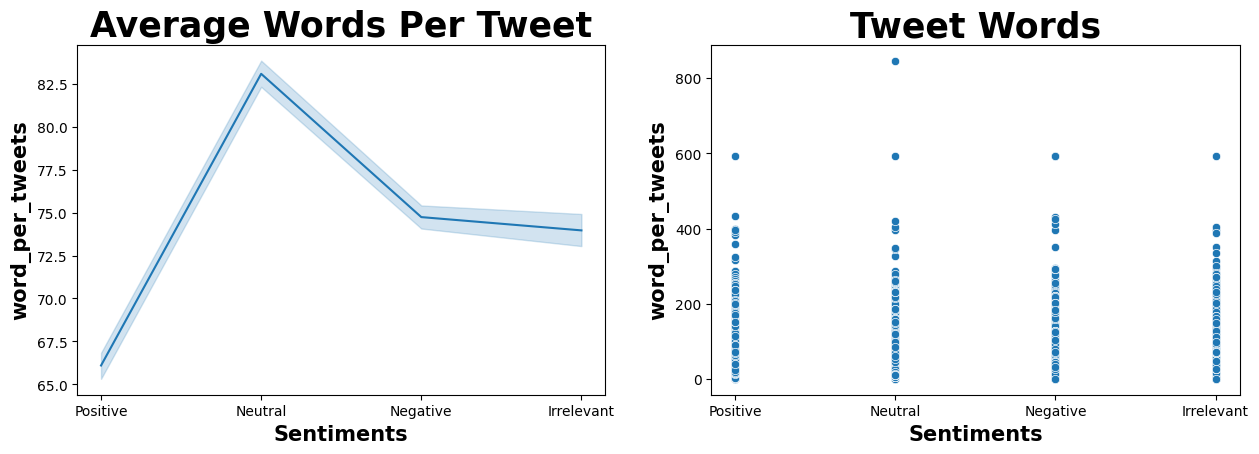

In [39]:
# average english words used in tweets

plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.lineplot(data=data, x=data['Sentiment'], y=data['tweet_words_counts'], legend ="full")
plt.xlabel('Sentiments',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('word_per_tweets',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Average Words Per Tweet',fontdict={'fontsize': 25, 'fontweight': 'bold'})

plt.subplot(2,2,2)
sns.scatterplot(data=data, x=data['Sentiment'], y=data['tweet_words_counts'])
plt.xlabel('Sentiments',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.ylabel('word_per_tweets',fontdict={'fontsize': 15, 'fontweight': 'bold'})
plt.title('Tweet Words',fontdict={'fontsize': 25, 'fontweight': 'bold'})

plt.show()

In [40]:
X = data['tweet_words']
y = data['Sentiment']

In [41]:
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.2, random_state=25)

In [42]:
Xtest

72143               ubisoft love official terminator event
26887    look like even ign report wrong next time yout...
29484    make new apex legends account get 22 kill firs...
15420    say hello sasha hostyn aka scarlett current hi...
71577                                    nothing see folks
                               ...                        
57004    rainbow6game win national grand larceny fence ...
60877                                    im rubbish im fun
42738    ptaofficialpk pubg source income many youngste...
56531    watch trailer sooooo loud already still give i...
4278                                           dont please
Name: tweet_words, Length: 13954, dtype: object

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

vector = TfidfVectorizer(max_features = 5000)

In [44]:
Xtrain = vector.fit_transform(Xtrain)
Xtest = vector.fit_transform(Xtest)

In [45]:
Xtrain.shape

(55815, 5000)

In [46]:
Xtrain = Xtrain.toarray()
Xtest = Xtest.toarray()

In [47]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()

In [48]:
gnb.fit(Xtrain, ytrain)

GaussianNB()

In [49]:
ypred1 = gnb.predict(Xtest)

In [50]:
ypred1

array(['Positive', 'Irrelevant', 'Negative', ..., 'Neutral', 'Negative',
       'Positive'], dtype='<U10')

In [51]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

In [52]:
print('accuracy_score ',accuracy_score(ytest, ypred1))
print('precision_score',precision_score(ytest, ypred1, average='weighted'))
print('recall_score', recall_score(ytest, ypred1, average='weighted'))
print('f1_score', f1_score(ytest, ypred1, average='weighted'))

accuracy_score  0.24623763795327505
precision_score 0.25732361964878214
recall_score 0.24623763795327505
f1_score 0.24646963441617675


In [53]:
confusion_matrix(ytest, ypred1)

array([[ 564,  659,  813,  454],
       [ 887, 1027, 1542,  767],
       [ 798,  896, 1101,  647],
       [ 985,  849, 1221,  744]])

In [54]:
mnb.fit(Xtrain, ytrain)

MultinomialNB()

In [55]:
ypred2 = mnb.predict(Xtest)

In [56]:
ypred2

array(['Neutral', 'Neutral', 'Negative', ..., 'Neutral', 'Negative',
       'Neutral'], dtype='<U10')

In [57]:
print('accuracy_score ',accuracy_score(ytest, ypred2))
print('precision_score',precision_score(ytest, ypred2, average='weighted'))
print('recall_score', recall_score(ytest, ypred2, average='weighted'))
print('f1_score', f1_score(ytest, ypred2, average='weighted'))

accuracy_score  0.25089580048731547
precision_score 0.2562103985569192
recall_score 0.25089580048731547
f1_score 0.24652008702372719
